# Logistic Regression

In this notebook we will train a logistic regression model based on a dataset called Iris. 

I must point out that no efforts have been made to optimise this code for either efficiency or elegance, and some of you will no doubt be able to find ways in which it could be improved.

**CAUTION** these notebooks are great, but you must be careful when running the cells out of order, especially if you are using mutable variables

## Loading a benchmark dataset

We'll use IRIS, which is described here: https://archive.ics.uci.edu/ml/datasets/iris

This dataset has 4 input variables, but we'll use only two of them, for illustration purposes.

This dataset has 3 possible classes, but we'll use only the first two classes, to transform it into a binary classification problem.

Number of examples: 99


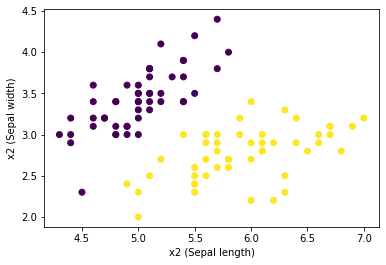

In [12]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

iris_dataset = datasets.load_iris()
X = iris_dataset.data[:, :2]  # For illustration purposes, we'll use only the first two input variables of this dataset
y = iris_dataset.target

# The examples are sorted by their classes.
# Let's get only the examples corresponding to the first two classes.
for c in range(len(y)):
    if y[c] == 2:
        break
y = y[:c-1]
X = X[:c-1,:]

print("Number of examples:", len(y))

# We can create a plot of the data as follows, where each class is printed in a different colour.
# As you'll see, the data are linearly separable and there are only two classes now.
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel("x2 (Sepal length)")
plt.ylabel("x2 (Sepal width)")
plt.show()

## Creating a training and a test split of the data

As with regression problems, we also need to create separate splits of the data for training and for testing. In particular, one can also use cross-validation to compare different models for classification problems.

Here, for illustration purposes, we will just create one training and one test split, so that we can visualise the resulting model. Each split contains a random selection of examples from the original dataset. The training split contains 67% of the examples, whereas the test split contains 33%.

The random state here is a random seed that will enable us to creating exactly the same random split again later on if we wish.

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=3)

print("Number of training examples:", len(y_train))
print("Number of test examples:", len(y_test))


Number of training examples: 66
Number of test examples: 33


## Training the model

The following is the logistic regression definition:

`class sklearn.linear_model.LogisticRegression(penalty=’l2’, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver=’warn’, max_iter=100, multi_class=’warn’, verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)`


The arguments that we will use are:
- random_state = 3: this is the random seed to be used by the optimiser sag, which will shuffle the data before starting to optimise.
- solver = 'sag': this is the optimisation algorithm to be used. We will choose Stochastic Average Gradient, which is an improvement of the Stochastic Gradient Descent to speed up the search for the optimum in problems where the function to be optimise is convex. PS: SAG uses a procedure that automatically decides the learning rate. So, we won't set the learning rate here.
- penalty = 'none': this tells the optimiser not to use any regularisation, which we will learn about later in the module.
- max_iter = 500: this is the maximum number of iterations for the optimiser.

In [14]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=3, solver='sag', penalty='l2', max_iter=10000)
# LR = LogisticRegression(random_state=3, solver='newton-cg', penalty='none', max_iter=100)
model = LR.fit(X_train, y_train)

## Visualising the model

We can visualise the decision boundary in a plot together with the training data, to get an idea of how good the learned coefficients are.

The code for the plot was created based on the following code contributed by user mwaskom in StackOverflow: https://stackoverflow.com/questions/28256058/plotting-decision-boundary-of-logistic-regression


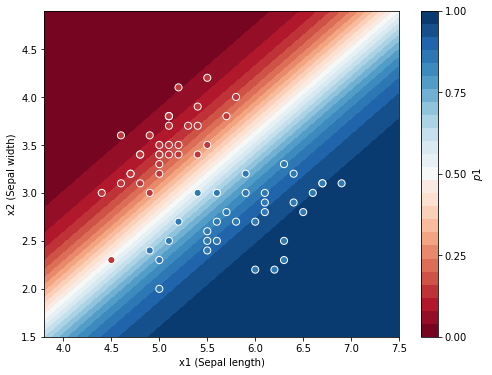

In [15]:
# Creating a fine grid of input values X. We will ask the model to provide predictions to all these examples.
# By doing that, we will know what probability is being associated to different regions of the space.

from numpy import mgrid
from numpy import linspace

# Set the minimum and maximum input values for the grid
x1_min, x1_max = X[:, 0].min() -0.5, X[:, 0].max() +0.5
x2_min, x2_max = X[:, 1].min() -0.5, X[:, 1].max() +0.5

# Generate grid_size equally spaced input values between the min and max values
x1_grid, x2_grid = np.mgrid[x1_min:x1_max:.01, x2_min:x2_max:.01]
#print(x1_grid)
#print(x2_grid)

# Place all the values of the x1 and x2 coordinates in an array with ravel
# Then create pairs of x1,x2 to generate the grid examples with c_
grid = np.c_[x1_grid.ravel(), x2_grid.ravel()]
#print(grid)

# Get the probabilities provided by the logistic regression model
probs = model.predict_proba(grid)[:, 1].reshape(x1_grid.shape)
#print(probs)

f, ax = plt.subplots(figsize=(8, 6))

# Plot the probability values for each grid example
contour = ax.contourf(x1_grid, x2_grid, probs, 25, cmap="RdBu") 

# Legend for the probability values
ax_c = f.colorbar(contour)
ax_c.set_label("$p1$")
ax_c.set_ticks([0, .25, .5, .75, 1])

# Plot training examples
ax.scatter(X_train[:,0], X_train[:, 1], c=y_train, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(x1_min, x1_max), ylim=(x2_min, x2_max),
       xlabel="x1 (Sepal length)", ylabel="x2 (Sepal width)");


## Evaluating

We now ask the model to provide predictions to the training and test examples.
We then compute the accuracy of the predictions, i.e., the percentage of correct predictions of the ouput variable.

In [16]:
def evaluate(predicted_labels, true_labels):
    
    accuracy = 0
    for i in range(len(true_labels)):
        if predicted_labels[i] == true_labels[i]:
            accuracy += 1
    accuracy /= len(true_labels)
    print("Accuracy:", accuracy)
    

In [17]:
predict_train = model.predict(X_train)
evaluate(predict_train, y_train)

Accuracy: 0.9848484848484849


In [18]:
predict_test = model.predict(X_test)
evaluate(predict_test, y_test)

Accuracy: 1.0


The accuracy can also be retrieved by using the built in method below:

In [19]:
print("Accuracy on training examples:", model.score(X_train,y_train))
print("Accuracy on test examples:", model.score(X_test,y_test))

Accuracy on training examples: 0.9848484848484849
Accuracy on test examples: 1.0


And you can retrieve the model coefficients based on the attributes below. 

In [20]:
print("Weights w1 and w2: ", model.coef_)
print("Weight w0: ", model.intercept_)

Weights w1 and w2:  [[ 2.41643035 -2.7794958 ]]
Weight w0:  [-4.46835226]
